In [1]:
###https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import pickle

def load_images_from_folder(folder, label, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)
            img = img.flatten()  # Flatten the image to a vector
            images.append(img)
            labels.append(label)
    return images, labels

# Load dataset
covid_images, covid_labels = load_images_from_folder('dataset/train/Covid', 'Covid')
normal_images, normal_labels = load_images_from_folder('dataset/train/Normal', 'Normal')
pneumonia_images, pneumonia_labels = load_images_from_folder('dataset/train/Viral Pneumonia', 'Viral Pneumonia')

# Combine and split data
X = np.array(covid_images + normal_images + pneumonia_images)
y = np.array(covid_labels + normal_labels + pneumonia_labels)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


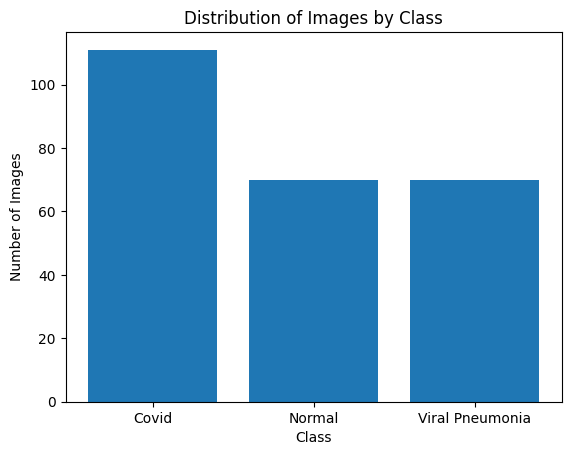

In [2]:
import matplotlib.pyplot as plt

# Count images in each class
labels, counts = np.unique(y, return_counts=True)
plt.bar(label_encoder.inverse_transform(labels), counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Class')
plt.show()

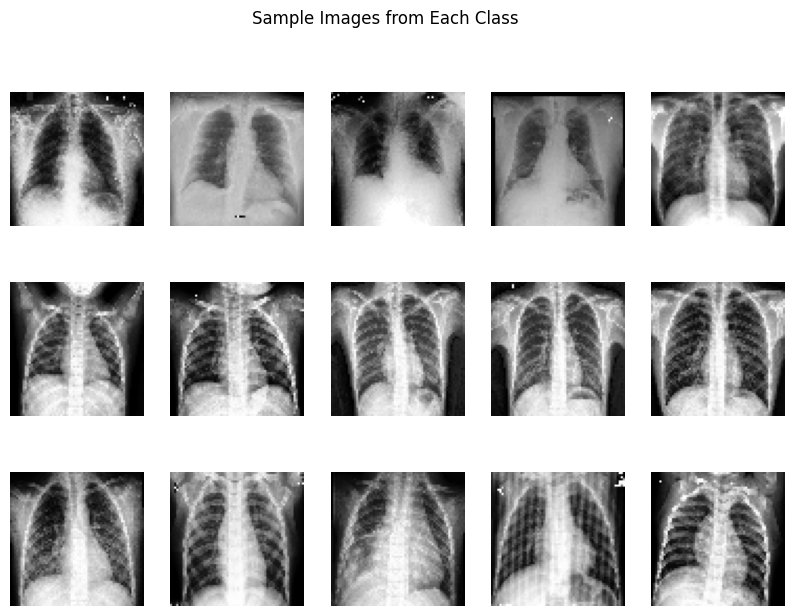

In [3]:
def plot_sample_images(X, y, label_encoder, samples_per_class=5):
    fig, axes = plt.subplots(len(np.unique(y)), samples_per_class, figsize=(10, 7))
    for i, label in enumerate(np.unique(y)):
        idxs = np.where(y == label)[0]
        for j in range(samples_per_class):
            ax = axes[i, j]
            img = X[idxs[j]].reshape(64, 64)
            ax.imshow(img, cmap='gray')
            ax.axis('off')
        axes[i, 0].set_ylabel(label_encoder.inverse_transform([label])[0])
    plt.suptitle('Sample Images from Each Class')
    plt.show()

plot_sample_images(X, y, label_encoder)


In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create a pipeline with PCA and SVM
pipeline = make_pipeline(PCA(n_components=50), SVC(kernel='linear'))

# Train the model
pipeline.fit(X_train, y_train)

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

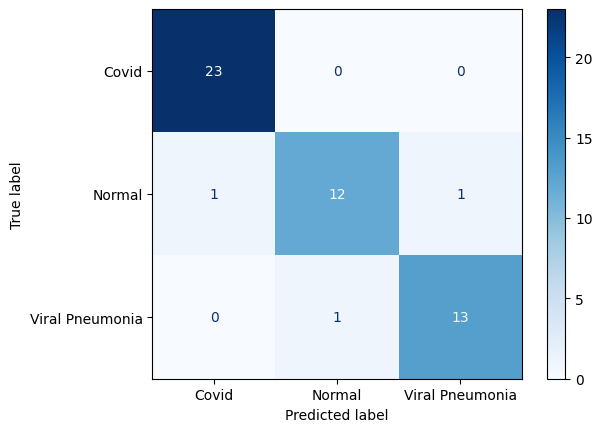

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=range(len(label_encoder.classes_)))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.92      0.86      0.89        14
           2       0.93      0.93      0.93        14

    accuracy                           0.94        51
   macro avg       0.94      0.93      0.93        51
weighted avg       0.94      0.94      0.94        51

